In [2]:
import numpy as np
import pandas as pd
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm


In [3]:
np.set_printoptions(precision = 4, suppress = True)
%matplotlib inline
plt.figure(figsize=(10,3))
# plt.style.use('seaborn-whitegrid')
plt.show()


<Figure size 1000x300 with 0 Axes>

In [4]:
df = pd.read_csv('mtcars.csv')
df

,cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Date,origin,type
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,01-05-2017,japan,sports
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,02-05-2017,japan,sports
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,03-05-2017,japan,compact
3,Hornet_4_Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,04-05-2017,us,muscle
4,Hornet_Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,05-05-2017,us,wagon
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,06-05-2017,Australia,sedan
6,Duster_360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,07-05-2017,South Africa,suv
7,Merc_240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,08-05-2017,Germany,sedan
8,Merc_230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,09-05-2017,Germany,coupe
9,Merc_280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,10-05-2017,Germany,coupe


In [7]:
x = df.loc[:, ["mpg","disp","drat"]].values
x


array([[ 21.  , 160.  ,   3.9 ],
       [ 21.  , 160.  ,   3.9 ],
       [ 22.8 , 108.  ,   3.85],
       [ 21.4 , 258.  ,   3.08],
       [ 18.7 , 360.  ,   3.15],
       [ 18.1 , 225.  ,   2.76],
       [ 14.3 , 360.  ,   3.21],
       [ 24.4 , 146.7 ,   3.69],
       [ 22.8 , 140.8 ,   3.92],
       [ 19.2 , 167.6 ,   3.92],
       [ 17.8 , 167.6 ,   3.92],
       [ 16.4 , 275.8 ,   3.07],
       [ 17.3 , 275.8 ,   3.07],
       [ 15.2 , 275.8 ,   3.07],
       [ 10.4 , 472.  ,   2.93],
       [ 10.4 , 460.  ,   3.  ],
       [ 14.7 , 440.  ,   3.23],
       [ 32.4 ,  78.7 ,   4.08],
       [ 30.4 ,  75.7 ,   4.93],
       [ 33.9 ,  71.1 ,   4.22],
       [ 21.5 , 120.1 ,   3.7 ],
       [ 15.5 , 318.  ,   2.76],
       [ 15.2 , 304.  ,   3.15],
       [ 13.3 , 350.  ,   3.73],
       [ 19.2 , 400.  ,   3.08],
       [ 27.3 ,  79.  ,   4.08],
       [ 26.  , 120.3 ,   4.43],
       [ 30.4 ,  95.1 ,   3.77],
       [ 15.8 , 351.  ,   4.22],
       [ 19.7 , 145.  ,   3.62],
       [ 1

In [8]:
y = df.loc[:, ["am"]].values
y


array([[1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

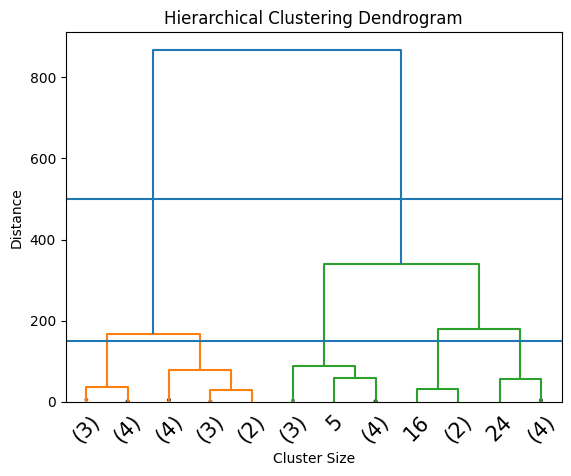

In [9]:
z = linkage(x,'ward')
dendrogram (z, truncate_mode ='lastp', p = 12, leaf_rotation = 45., leaf_font_size = 15., show_contracted = True)
plt.title ('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=500)
plt.axhline(y=150)
plt.show()


In [10]:
k = 2
Hclustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
Hclustering.fit(x)


/home/pydev/pyenv/envSpark/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [11]:
sm.accuracy_score(y, Hclustering.labels_)


0.78125